In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    # Keep only columns with 2–49 unique values
    nunique = df.nunique()
    df = df[[col for col in df.columns 
             if 1 < nunique[col] < 50]]
    
    nCol = df.shape[1]
    columnNames = df.columns.tolist()
    
    # Compute integer number of rows
    nGraphRow = math.ceil(nCol / nGraphPerRow)
    
    plt.figure(figsize=(6 * nGraphPerRow, 4 * nGraphRow), dpi=80)
    
    for i, col in enumerate(columnNames[:nGraphShown]):
        ax = plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        series = df[col].dropna()
        
        if not np.issubdtype(series.dtype, np.number):
            # Categorical: bar plot
            series.value_counts().plot.bar(ax=ax)
        else:
            # Numeric: histogram
            series.hist(ax=ax, bins=20, edgecolor='black')
        
        ax.set_ylabel('counts')
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
        ax.set_title(f'{col}')
    
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()

In [3]:
def plotCorrelationMatrix(df, graphWidth, dfName='DataFrame'):
    df = df.dropna(axis='columns')
    
    # Select only numeric columns
    df_numeric = df.select_dtypes(include=['number'])
    
    # Keep columns with more than 1 unique value
    df_numeric = df_numeric[[col for col in df_numeric.columns if df_numeric[col].nunique() > 1]]
    
    if df_numeric.shape[1] < 2:
        print(f'No correlation plots shown: The number of numeric columns with >1 unique value ({df_numeric.shape[1]}) is less than 2')
        return
    
    corr = df_numeric.corr()
    
    plt.figure(figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum=1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {dfName}', fontsize=15)
    plt.show()

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plotScatterMatrix(df, plotSize, textSize):
    df_num = df.select_dtypes(include=[np.number])  # keep only numerical columns
    df_num = df_num.dropna(axis=1)  # drop columns with NaN
    df_num = df_num[[col for col in df_num.columns if df_num[col].nunique() > 1]]  # cols with >1 unique value
    
    columnNames = list(df_num.columns)
    if len(columnNames) == 0:
        print("No columns to plot after filtering.")
        return
    
    if len(columnNames) > 10:
        columnNames = columnNames[:10]
    df_num = df_num[columnNames]

    ax = pd.plotting.scatter_matrix(df_num, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df_num.corr().values
    
    # Annotate upper triangle with correlation coefficients
    for i in range(len(columnNames)):
        for j in range(i+1, len(columnNames)):
            ax[i, j].annotate(f'Corr. coef = {corrs[i, j]:.3f}', 
                              xy=(0.8, 0.2), xycoords='axes fraction', 
                              ha='center', va='center', size=textSize)
    
    plt.suptitle('Scatter and Density Plot', fontsize=16)
    plt.tight_layout()
    plt.show()

In [5]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df1 = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'Mall_Customers.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 200 rows and 5 columns


In [6]:
df1.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


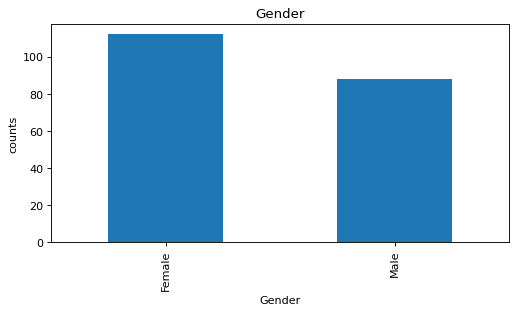

In [7]:
plotPerColumnDistribution(df1, 10, 5)

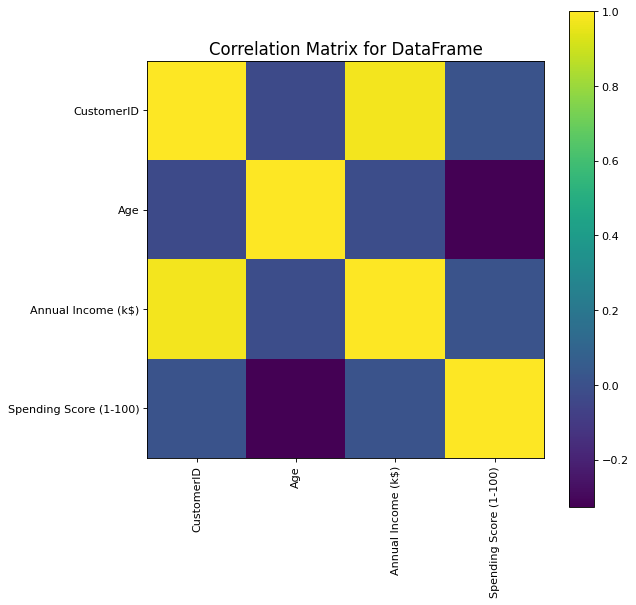

In [8]:
plotCorrelationMatrix(df1, 8)

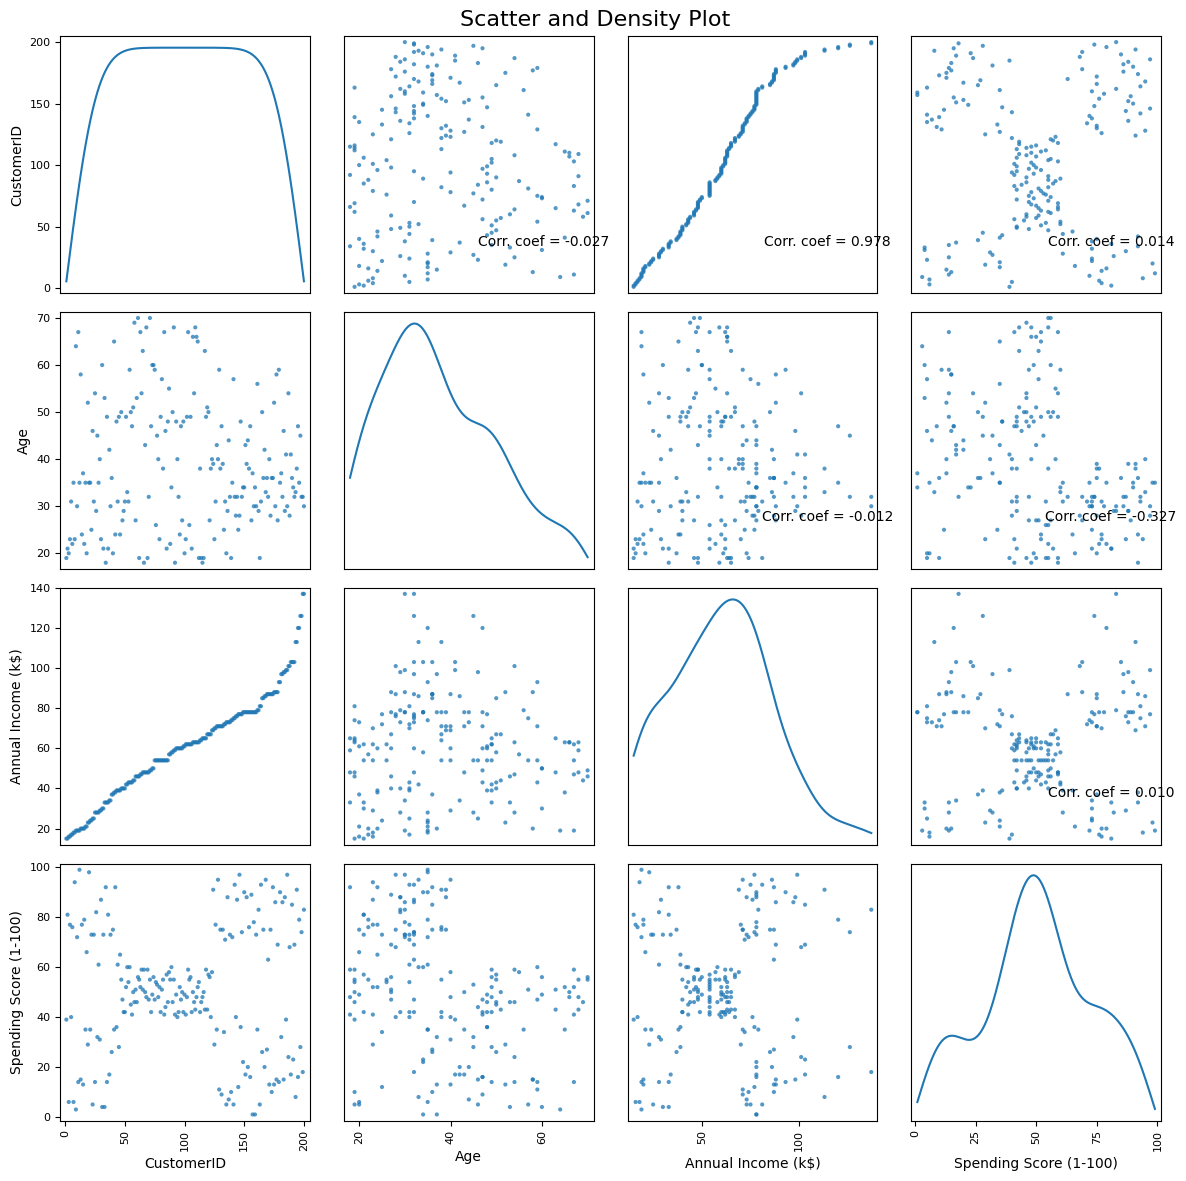

In [9]:
plotScatterMatrix(df1, 12, 10)